In [ ]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 2.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
# 플랫폼이 영향을 끼치는가?
# 어디지역을 타겟으로 하고 진출해야될까?
# 코로나 영향이 있을까??(게임이용시간, 여가시간)

In [7]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [8]:
from google.colab import data_table

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
url = '/content/drive/MyDrive/sample/vgames2.csv'
df = pd.read_csv(url, index_col = 0) 
df.isnull().sum() #결측치가 약 400개 정도 된다. 약 2% 삭제해도 크게 영향을 끼치진 않을꺼 같다.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [10]:
#데이터 타입 변환

def tostr(string):
    return str(string.replace('K','000'))

df['NA_Sales'] = df['NA_Sales'].apply(tostr)
df['EU_Sales'] = df['EU_Sales'].apply(tostr)
df['JP_Sales'] = df['JP_Sales'].apply(tostr)
df['Other_Sales'] = df['Other_Sales'].apply(tostr)

def tostr2(string):
    return str(string.replace('M',''))

df['NA_Sales'] = df['NA_Sales'].apply(tostr2)
df['EU_Sales'] = df['EU_Sales'].apply(tostr2)
df['JP_Sales'] = df['JP_Sales'].apply(tostr2)
df['Other_Sales'] = df['Other_Sales'].apply(tostr2)

df['NA_Sales']=df['NA_Sales'].astype('float')
df['EU_Sales']=df['EU_Sales'].astype('float')
df['JP_Sales']=df['JP_Sales'].astype('float')
df['Other_Sales']=df['Other_Sales'].astype('float')

In [11]:
df1 = df

In [12]:
# 연도도 오류로 보이는 값들이 보여 수정
df1['Year'] = df1['Year'].astype(int)
df1['Year'] = df1['Year'].apply(lambda x: x+2000 if 22> x >=0 else x)
df1['Year'] = df1['Year'].apply(lambda x: x+1900 if 100> x >22 else x)
df2 = df1.reset_index(drop='True')
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [13]:
df3 = df2

In [14]:
df3['NA_Sales'] = df3['NA_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
df3['EU_Sales'] = df3['EU_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
df3['JP_Sales'] = df3['JP_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
df3['Other_Sales'] = df3['Other_Sales'].apply(lambda x: x/1000000 if x>=1000 else x)
# 단위,연도 맞추고 결측치 제거된 데이터셋

In [15]:
# 보기좋게 단위를 k로 맞춤
df3['NA_Sales'] = df3['NA_Sales'].apply(lambda x: x*1000)
df3['EU_Sales'] = df3['EU_Sales'].apply(lambda x: x*1000)
df3['JP_Sales'] = df3['JP_Sales'].apply(lambda x: x*1000)
df3['Other_Sales'] = df3['Other_Sales'].apply(lambda x: x*1000)
df4 = df3

In [16]:
df4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [17]:
# total이라는 항목추가
re = df4.iloc[:,[5,6,7,8]]
df4['total'] = re.sum(axis=1)
df4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


In [18]:
# 통상적으로 표준화를 통해 이상치를 제거하고, 그 다음 데이터를 정규화 해 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다 (https://heeya-stupidbutstudying.tistory.com/32)

# 이상치 대체Outlier Replacement

# 1) 하한값과 상한값을 결정한 후 하한값보다 적으면 하한값으로 대체, 상한값보다 크면 상한값으로 대체함

# 2) 평균의 표준편차 

#    하한값 = 평균 - n*표준편차, 상한값 = 평균 + n*표준편차  일반적으로 3시그마 (99.7% 이상 혹은 이하값을 이상치로 제거하거나 대체)

# 3) 평균 절대 편차

#    중위수로부터 n편차 큰 값을 대체

# 4) 극 백분위수 

#    상위 p번째 백분위수보다 큰 값을 대체

In [19]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까?
# 여기선 지역별 판매량을과 게임 장르를 보고 분석할수 있을꺼같다.
df_game_area = df4.iloc[:,[5,6,7,8]]
df_game_area.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000
mean,265.195493,147.378240,78.282741,48.234099
std,822.430729,508.339696,309.271989,189.677999
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,80.000000,20.000000,0.000000,10.000000
75%,240.000000,110.000000,40.000000,40.000000
max,41490.000000,29020.000000,10220.000000,10570.000000


In [20]:
stand = StandardScaler()
df_stand = stand.fit_transform(df_game_area)

df_scale = pd.DataFrame(df_stand, columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
df_scale

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,-0.273825,-0.289930,-0.253127,-0.254302
1,-0.115753,-0.289930,-0.253127,-0.201580
2,-0.322463,-0.289930,-0.188457,-0.254302
3,-0.273825,-0.289930,-0.253127,-0.254302
4,-0.176550,-0.112877,-0.253127,-0.043412
...,...,...,...,...
16236,-0.140071,-0.211240,-0.253127,-0.201580
16237,-0.310304,-0.289930,-0.253127,-0.254302
16238,0.212553,0.083848,-0.156122,0.431091
16239,-0.261666,-0.191567,0.555248,-0.096135


<function matplotlib.pyplot.show>

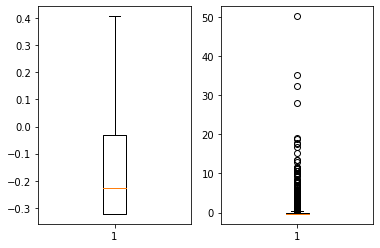

In [21]:
# 이상치를 조정 : 경계값 너머값들은 상한값, 하한값으로 치환
IQR = df_scale['NA_Sales'].quantile(0.75)-df_scale['NA_Sales'].quantile(0.25)
line_d = df_scale['NA_Sales'].quantile(0.25) - IQR*1.5
line_u = df_scale['NA_Sales'].quantile(0.75) + IQR*1.5

ww = df_scale['NA_Sales'].clip(line_d,line_u) #clip(x,y) x=최소값 아래값은 모두 x, y=최대값 초과값은 모두 y

fig, ax = plt.subplots(1,2)
ax[0].boxplot(ww)
ax[1].boxplot(df_scale['NA_Sales'])
plt.show

In [22]:
# 이상치 조정2
IQR2 = df_scale['EU_Sales'].quantile(0.75)-df_scale['EU_Sales'].quantile(0.25)
line_d2 = df_scale['EU_Sales'].quantile(0.25) - IQR2*1.5
line_u2 = df_scale['EU_Sales'].quantile(0.75) + IQR2*1.5
ww2 = df_scale['EU_Sales'].clip(line_d2,line_u2)

IQR3 = df_scale['JP_Sales'].quantile(0.75)-df_scale['JP_Sales'].quantile(0.25)
line_d3 = df_scale['JP_Sales'].quantile(0.25) - IQR2*1.5
line_u3 = df_scale['JP_Sales'].quantile(0.75) + IQR2*1.5
ww3 = df_scale['JP_Sales'].clip(line_d3,line_u3)

IQR4 = df_scale['Other_Sales'].quantile(0.75)-df_scale['Other_Sales'].quantile(0.25)
line_d4 = df_scale['Other_Sales'].quantile(0.25) - IQR2*1.5
line_u4 = df_scale['Other_Sales'].quantile(0.75) + IQR2*1.5
ww4 = df_scale['Other_Sales'].clip(line_d4,line_u4)

In [23]:
df_stand_fin = pd.concat([df2['Genre'],ww,ww2,ww3,ww4], axis=1)
df_stand_fin
tt = df_stand_fin.iloc[:,[1,2,3,4]]
tt

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,-0.273825,-0.289930,-0.253127,-0.254302
1,-0.115753,-0.289930,-0.253127,-0.201580
2,-0.322463,-0.289930,-0.188457,-0.254302
3,-0.273825,-0.289930,-0.253127,-0.254302
4,-0.176550,-0.112877,-0.253127,-0.043412
...,...,...,...,...
16236,-0.140071,-0.211240,-0.253127,-0.201580
16237,-0.310304,-0.289930,-0.253127,-0.254302
16238,0.212553,0.083848,-0.156122,0.281184
16239,-0.261666,-0.191567,0.200809,-0.096135


In [24]:
# 정규화
normal = MinMaxScaler()
normal2 = normal.fit_transform(tt)

df_scale2 = pd.DataFrame(normal2, columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
df_scale2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.066667,0.000000,0.000000,0.000000
1,0.283333,0.000000,0.000000,0.098457
2,0.000000,0.000000,0.142465,0.000000
3,0.066667,0.000000,0.000000,0.000000
4,0.200000,0.327273,0.000000,0.393829
...,...,...,...,...
16236,0.250000,0.145455,0.000000,0.098457
16237,0.016667,0.000000,0.000000,0.000000
16238,0.733333,0.690909,0.213697,1.000000
16239,0.083333,0.181818,1.000000,0.295372


In [25]:
# 1.지역에 따라서 선호하는 게임 장르가 다를까?
# 여기선 지역별 판매량을과 게임 장르를 보고 분석할수 있을꺼같다.
df_area = pd.concat([df3['Genre'], df_scale2], axis=1,ignore_index=False)

#df_game_area.drop_duplicates(['Genre'])
# 장르가 무엇이 있는지 확인
df_area

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.066667,0.000000,0.000000,0.000000
1,Action,0.283333,0.000000,0.000000,0.098457
2,Adventure,0.000000,0.000000,0.142465,0.000000
3,Misc,0.066667,0.000000,0.000000,0.000000
4,Platform,0.200000,0.327273,0.000000,0.393829
...,...,...,...,...,...
16236,Platform,0.250000,0.145455,0.000000,0.098457
16237,Action,0.016667,0.000000,0.000000,0.000000
16238,Sports,0.733333,0.690909,0.213697,1.000000
16239,Action,0.083333,0.181818,1.000000,0.295372


In [26]:
# 지역, 장르별 데이터
df_sum = df_area.groupby(df_area['Genre']).sum()
df_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,956.483333,983.618182,578.088730,913.959051
Adventure,135.616667,149.090909,253.782554,126.571213
Fighting,241.300000,229.454545,277.788331,217.320753
Misc,413.383333,372.963636,286.155475,374.162382
Platform,343.400000,314.581818,195.306605,262.695523
Puzzle,115.250000,98.818182,110.920389,83.172855
Racing,371.883333,410.672727,110.432599,354.117470
Role-Playing,304.183333,302.509091,693.417727,308.406944
Shooter,465.916667,496.909091,165.717242,445.424636


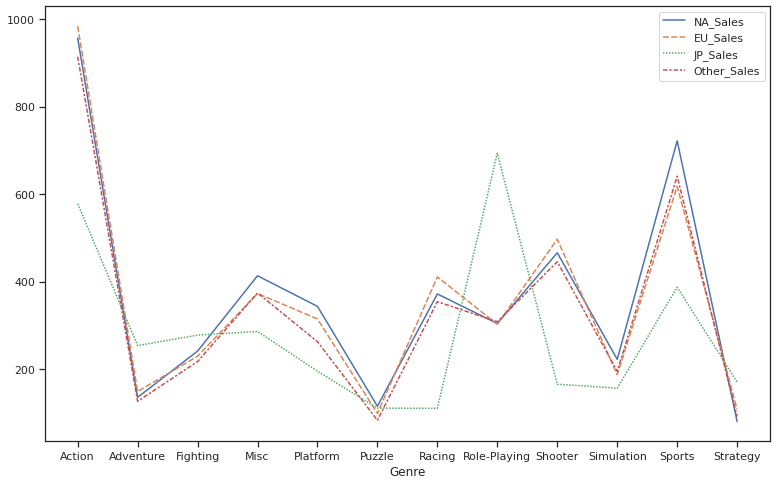

In [27]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_style('ticks') 
sns.lineplot(data=df_sum)

plt.show()
# 그래프와 같이 일본뺴고는 지역별 게임장르가 영향을 끼치진 않는다.

In [28]:
df_sum.corr()
# 상관계수 > 0 이므로 양의관계에 잇다. 지역과는 상관이 없어보인다.(장르에 따라 판매량이 다르다는것을 유추)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.987345,0.528345,0.995006
EU_Sales,0.987345,1.000000,0.520952,0.993757
JP_Sales,0.528345,0.520952,1.000000,0.560863
Other_Sales,0.995006,0.993757,0.560863,1.000000


In [29]:
re = df_area.iloc[:,[1,2,3,4]]
re['total'] = re.sum(axis=1)
re

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,0.066667,0.000000,0.000000,0.000000,0.066667
1,0.283333,0.000000,0.000000,0.098457,0.381791
2,0.000000,0.000000,0.142465,0.000000,0.142465
3,0.066667,0.000000,0.000000,0.000000,0.066667
4,0.200000,0.327273,0.000000,0.393829,0.921102
...,...,...,...,...,...
16236,0.250000,0.145455,0.000000,0.098457,0.493912
16237,0.016667,0.000000,0.000000,0.000000,0.016667
16238,0.733333,0.690909,0.213697,1.000000,2.637940
16239,0.083333,0.181818,1.000000,0.295372,1.560524


In [30]:
# 2.연도별 게임의 트렌드가 있을까
df_year2 = pd.concat([df4['Year'],df4['Genre'],df4['total']],axis=1)
df_year2 = df_year2.sort_values(by='Year' ,ascending=False)
df_year2
# 스케일 x

,Year,Genre,total
6765,2020,Simulation,290.0
9911,2017,Role-Playing,30.0
5196,2017,Action,10.0
14903,2017,Role-Playing,10.0
3663,2016,Misc,30.0
...,...,...,...
13958,1980,Fighting,770.0
7171,1980,Misc,230.0
9924,1980,Misc,1050.0
5817,1980,Misc,1150.0


In [31]:
# 연도가 너무많아 10년단위로 그룹하고 2020년뒤로는 년도가 적어 2010년부터 묶음
df_year2['Year'] = df_year2['Year'].apply(lambda x: 1 if 1990>x>=1980 else x)
df_year2['Year'] = df_year2['Year'].apply(lambda x: 2 if 2000>x>=1990 else x)
df_year2['Year'] = df_year2['Year'].apply(lambda x: 3 if 2010>x>=2000 else x)
df_year2['Year'] = df_year2['Year'].apply(lambda x: 4 if x>=2010 else x)
df_year2

,Year,Genre,total
6765,4,Simulation,290.0
9911,4,Role-Playing,30.0
5196,4,Action,10.0
14903,4,Role-Playing,10.0
3663,4,Misc,30.0
...,...,...,...
13958,1,Fighting,770.0
7171,1,Misc,230.0
9924,1,Misc,1050.0
5817,1,Misc,1150.0


In [32]:
#1980~1989년
mask1 = (df_year2.Year == 1)
df_year_1 = df_year2.loc[mask1,:]
df_year_1 = df_year_1.groupby(['Genre']).sum().reset_index()
df_a = df_year_1.sort_values(by='total' ,ascending=False)
df_a

,Genre,Year,total
4,Platform,33,122260.0
5,Puzzle,19,62750.0
8,Shooter,30,59770.0
0,Action,66,51100.0
10,Sports,22,31780.0
7,Role-Playing,9,15250.0
6,Racing,8,12100.0
3,Misc,8,8440.0
2,Fighting,4,7240.0
1,Adventure,2,4780.0


In [33]:
mask2 = (df_year2.Year == 2)
df_b = df_year2.loc[mask2,:]
df_b = df_b.groupby(['Genre']).sum().reset_index()
df_b = df_b.sort_values(by='total' ,ascending=False)

mask3 = (df_year2.Year == 3)
df_c = df_year2.loc[mask3,:]
df_c = df_c.groupby(['Genre']).sum().reset_index()
df_c = df_c.sort_values(by='total' ,ascending=False)

mask4 = (df_year2.Year == 4)
df_d = df_year2.loc[mask4,:]
df_d = df_d.groupby(['Genre']).sum().reset_index()
df_d = df_d.sort_values(by='total' ,ascending=False)


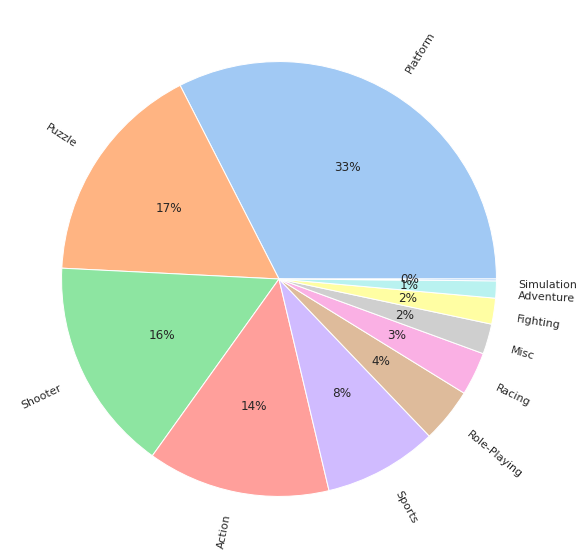

In [34]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_a['total'], labels=df_a['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

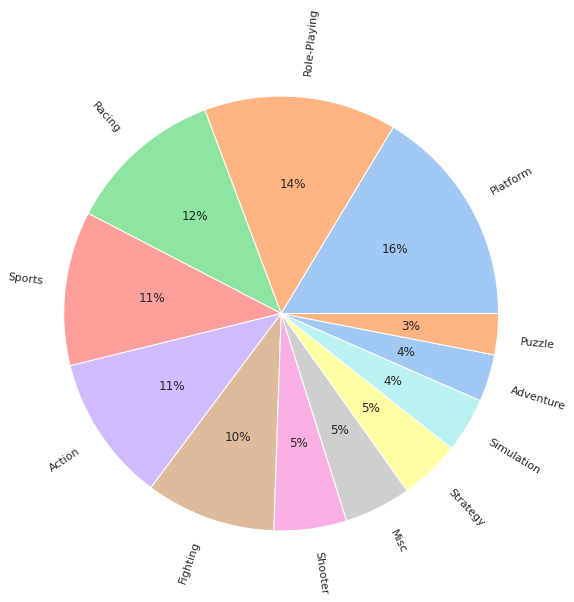

In [35]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_b['total'], labels=df_b['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

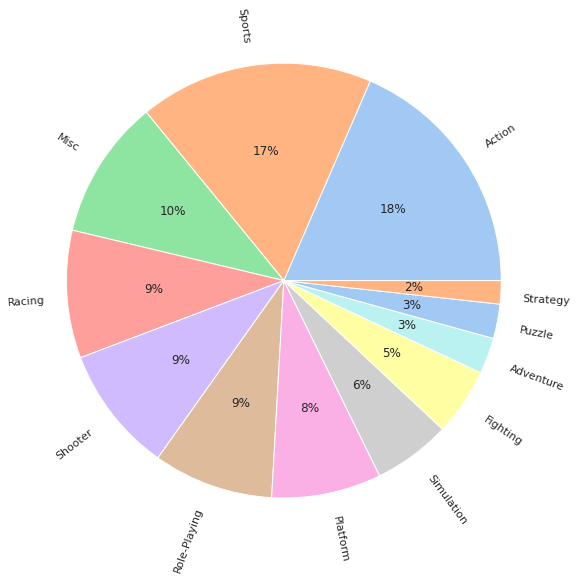

In [36]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_c['total'], labels=df_c['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

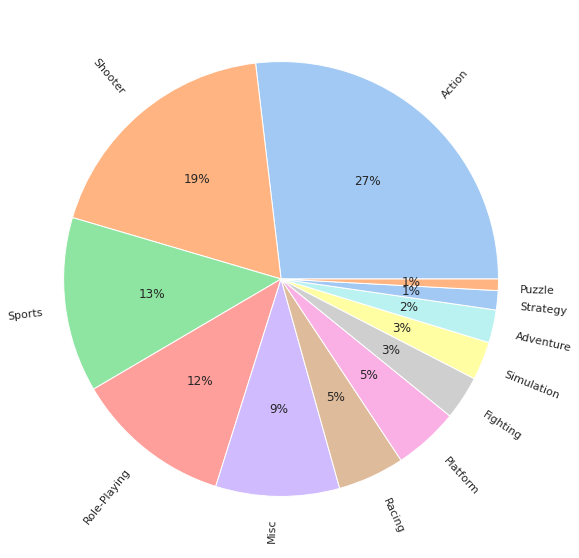

In [37]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(df_d['total'], labels=df_d['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [38]:
df_year = pd.concat([df4['Year'],df4['Genre'],re['total']],axis=1)
df_year
# 스케일 정규화

,Year,Genre,total
0,2008,Action,0.066667
1,2009,Action,0.381791
2,2010,Adventure,0.142465
3,2010,Misc,0.066667
4,2010,Platform,0.921102
...,...,...,...
16236,2006,Platform,0.493912
16237,2005,Action,0.016667
16238,2015,Sports,2.637940
16239,2013,Action,1.560524


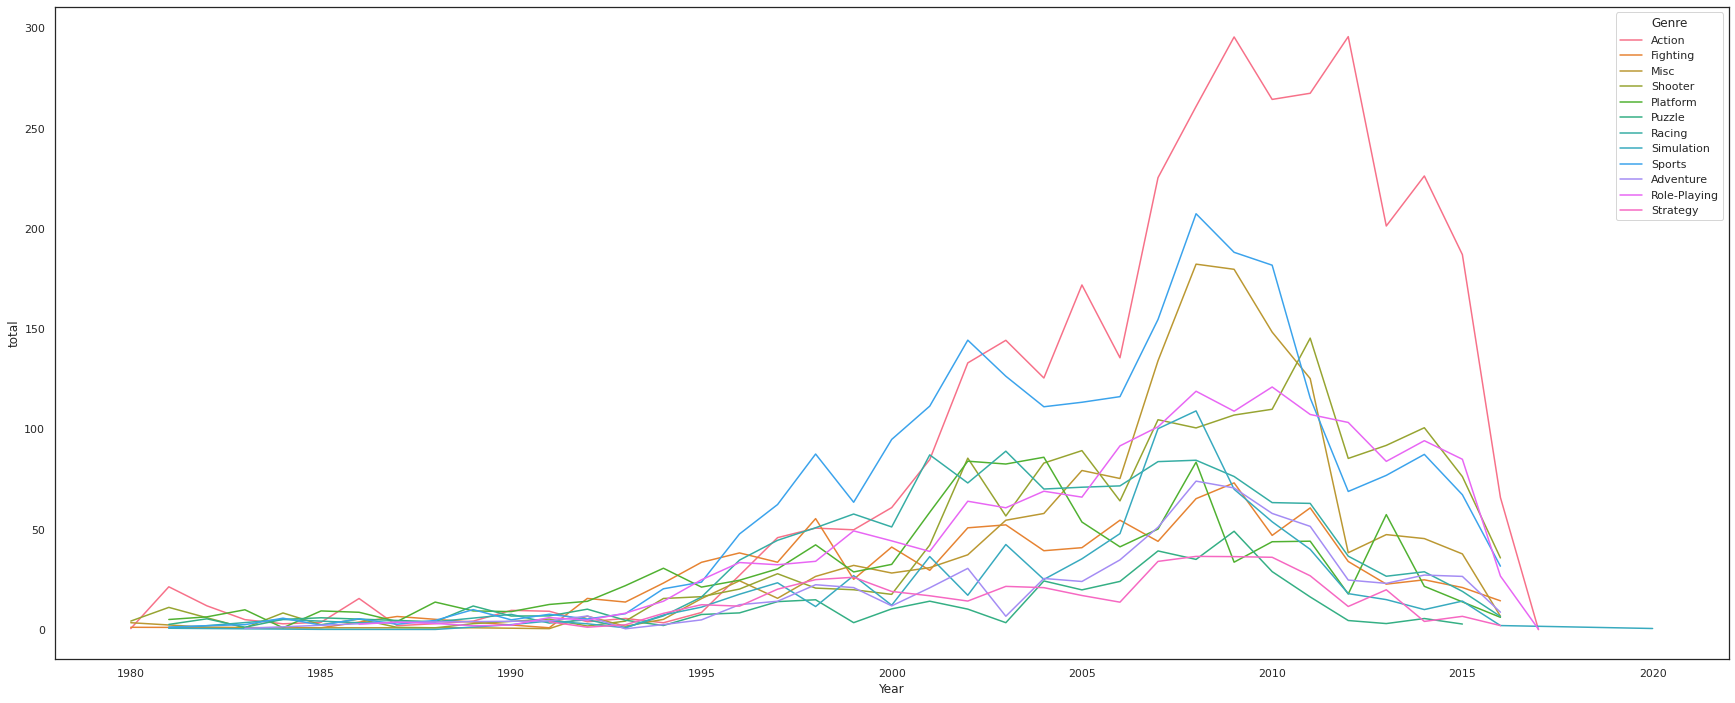

In [39]:
sns.set(rc = {'figure.figsize':(30,12)})
sns.set_style("white")
df_by_group_label2 = df_year.groupby(['Year','Genre'])['total'].sum().reset_index()
sns.lineplot(x='Year', y='total', hue='Genre',data=df_by_group_label2)
# 스케일 정규화

In [70]:
# 연도순위로 재정렬
df_sorted = df_year.sort_values(by='Year' ,ascending=True)
df_year3 = df_sorted.reset_index(drop=True)
df_year3.tail(20)

,Year,Genre,total
16221,2016,Action,2.190799
16222,2016,Sports,0.243912
16223,2016,Platform,0.512066
16224,2016,Action,0.053030
16225,2016,Role-Playing,1.047255
16226,2016,Action,0.168154
16227,2016,Strategy,0.356162
16228,2016,Fighting,0.830220
16229,2016,Action,0.036364
16230,2016,Simulation,0.142465


In [45]:
df_year4 = df_year3.groupby(['Year','Genre']).sum()
df_year4

total
Year Genre                  
1980 Action         0.606061
     Fighting       1.243912
     Misc           3.525703
     Shooter        4.351295
1981 Action        21.443609
...                      ...
2016 Sports        31.717317
     Strategy       2.096961
2017 Action         0.071232
     Role-Playing   0.284930
2020 Simulation     0.646915

[388 rows x 1 columns]

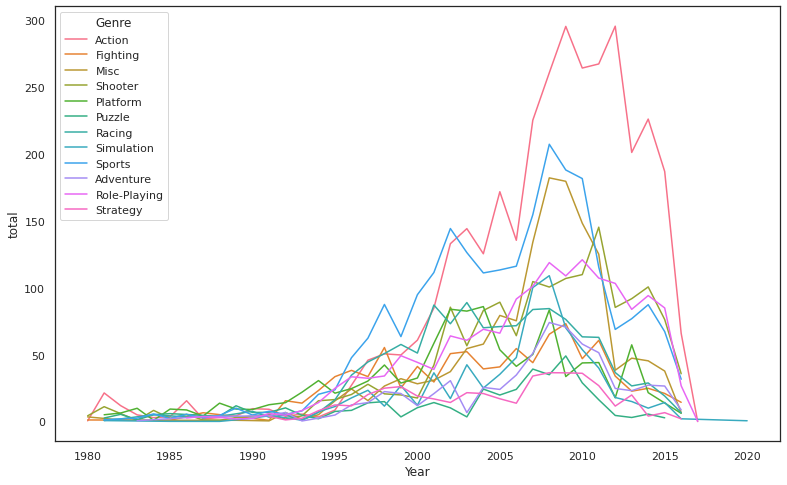

In [46]:
plt.figure(figsize=(13,8)) 
sns.lineplot(x="Year", y="total", hue="Genre", data=df_year4)

In [47]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# model = ols('total ~ C(Year) * C(Genre)', df_year3).fit() 같은방식이다
model = ols('total ~ C(Year) + C(Genre) + C(Year) : C(Genre)', df_year3).fit()
anova_lm(model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
C(Year),38.0,532.299100,14.007871,15.097784,6.481383e-95
C(Genre),11.0,598.876359,54.443305,58.679385,1.303972e-128
C(Year):C(Genre),418.0,687.125649,1.643841,1.771744,1.297354e-19
Residual,15853.0,14708.567823,0.927810,NaN,NaN


In [ ]:
# h0 : 연도별 게임트렌드는 관계가 없을것이다.
# h1 : 연도별 게임트렌드는 관계가 있을것이다.
# p-value < 0.05 귀무가설 기각, 연도별 게임트렌드는 관계가 있다

In [ ]:
# 3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [48]:
df_new = df4

In [49]:
re5 = df4.iloc[:,[5,6,7,8]]
df_new['total'] = re5.sum(axis=1)
df_new
#스케일 ㄴㄴ

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0,200.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0,10.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0,790.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0,380.0


In [50]:
df_new2 = df_scale2

In [51]:
re6  = df_scale2.iloc[:,[0,1,2,3]]
df_new2['total'] = re6.sum(axis=1)
df_new2 = pd.concat([df4.iloc[:,[0,1,2,3,4]], df_new2], axis=1)
df_new2
#스케일 정규화

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.066667,0.000000,0.000000,0.000000,0.066667
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.283333,0.000000,0.000000,0.098457,0.381791
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.000000,0.000000,0.142465,0.000000,0.142465
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.066667,0.000000,0.000000,0.000000,0.066667
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.200000,0.327273,0.000000,0.393829,0.921102
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.250000,0.145455,0.000000,0.098457,0.493912
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.016667,0.000000,0.000000,0.000000,0.016667
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.733333,0.690909,0.213697,1.000000,2.637940
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.083333,0.181818,1.000000,0.295372,1.560524


In [52]:
df_sorted2 = df_new.sort_values(by='total' ,ascending=False)
df_new3 = df_sorted2.reset_index(drop=True)
df_new3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
16236,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10.0,0.0,0.0,0.0,10.0
16237,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10.0,0.0,0.0,0.0,10.0
16238,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10.0,0.0,0.0,0.0,10.0
16239,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.0,10.0,0.0,0.0,10.0


In [53]:
sample3 = df_new3.groupby('Publisher').sum()
sample3.drop(['Year'], axis=1, inplace=True)
sample4 = sample3.sort_values(by='total' ,ascending=False)
total = sample4.head(10)
total = total.reset_index()

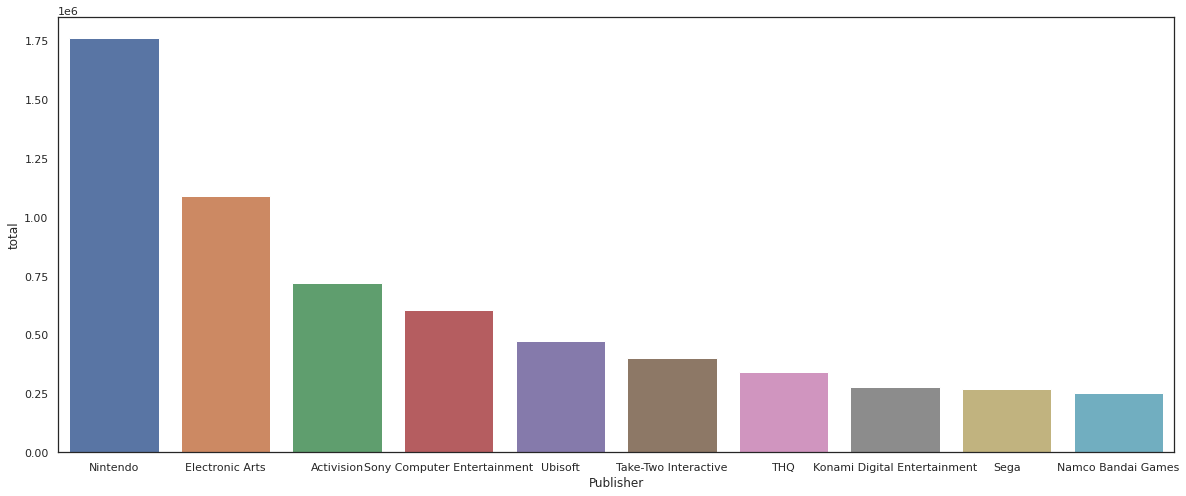

In [54]:
sns.set_style("white")
plt.figure(figsize=(20,8)) 
sns.barplot(x="Publisher", y="total", data=total)

In [55]:
#장르별 출고량
sol = df_year2[['Genre','total']]
sol2 = sol.groupby(sol['Genre']).sum()
sol2 = sol2.reset_index(inplace=False)
sol2 = sol2.sort_values(by='total' ,ascending=False)
sol3 = sol2.reset_index(drop=True)
sol3


,Genre,total
0,Action,1712980.0
1,Sports,1305340.0
2,Shooter,1024750.0
3,Role-Playing,901510.0
4,Platform,827990.0
5,Misc,779700.0
6,Racing,722550.0
7,Fighting,443540.0
8,Simulation,389280.0
9,Puzzle,240730.0


In [56]:
df5 = df4.sort_values(by='total' ,ascending=False)
df5 = df5.reset_index(drop=True)
df5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
16236,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10.0,0.0,0.0,0.0,10.0
16237,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10.0,0.0,0.0,0.0,10.0
16238,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10.0,0.0,0.0,0.0,10.0
16239,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.0,10.0,0.0,0.0,10.0


In [ ]:
#

In [224]:
test_df_mario = df5[df5['Name'].str.contains('Mario')]
test_df_mario

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380.0,9230.0,6500.0,2900.0,30010.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590.0,7060.0,4700.0,2260.0,28610.0
11,Mario Kart DS,DS,2005,Racing,Nintendo,9810.0,7570.0,4130.0,1920.0,23430.0
...,...,...,...,...,...,...,...,...,...,...
12084,Mario vs. Donkey Kong: Tipping Stars,3DS,2015,Puzzle,Nintendo,0.0,0.0,60.0,0.0,60.0
12885,Detective Conan: Marionette Symphony,3DS,2013,Adventure,Namco Bandai Games,0.0,0.0,50.0,0.0,50.0
12965,Dance Dance Revolution: Mario Mix (JP sales),GC,2005,Simulation,Nintendo,0.0,0.0,50.0,0.0,50.0
15565,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.0,0.0,10.0,0.0,10.0


In [ ]:
test_df_wii = df5[df5['Name'].str.contains('Wii')]
test_df_wii

In [57]:
# 닌텐도 게임
test_df_niten = df5[df5['Publisher'].str.contains('Nintendo')]
test_df_niten

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
15760,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.0,0.0,10.0,0.0,10.0
15839,Nintendogs and Cats Golden Retriever and New F...,3DS,2011,Action,Nintendo,0.0,10.0,0.0,0.0,10.0
15937,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.0,0.0,10.0,0.0,10.0
16177,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.0,0.0,10.0,0.0,10.0


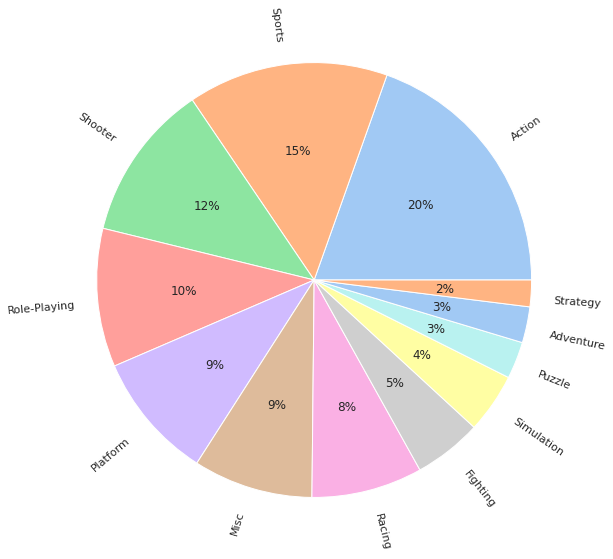

In [206]:
labels3 = sol3['Genre'] 
frequency3 = sol3['total']

colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(frequency3, labels=labels3, colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [59]:
# 닌텐도
isin_filter = df_new3['Publisher'].isin(['Nintendo'])
df_isin = df_new3[isin_filter]
df_nin = df_isin.reset_index(drop=True)
df_nin2 = df_nin[['Genre','total']]
df_nin2

,Genre,total
0,Sports,82740.0
1,Platform,40240.0
2,Racing,35830.0
3,Sports,33000.0
4,Role-Playing,31380.0
...,...,...
687,Action,10.0
688,Action,10.0
689,Puzzle,10.0
690,Misc,10.0


In [60]:
nin_sum = df_nin2.groupby(df_nin2['Genre']).sum()
nin2 = nin_sum.reset_index(inplace=False)
nin2 = nin2.sort_values(by='total' ,ascending=False)
nin3 = nin2.reset_index(drop=True)
nin3


,Genre,total
0,Platform,426150.0
1,Role-Playing,270180.0
2,Sports,218000.0
3,Misc,172140.0
4,Racing,150230.0
5,Action,128150.0
6,Puzzle,124070.0
7,Simulation,85260.0
8,Shooter,69660.0
9,Fighting,53330.0


In [64]:
# 소니
isin_filter = df_new3['Publisher'].isin(['Sony Computer Entertainment'])
df_isin3 = df_new3[isin_filter]
df_son = df_isin3.reset_index(drop=True)
df_son = df_son[['Genre','total']]

son_sum = df_son.groupby(df_nin2['Genre']).sum()
son2 = son_sum.reset_index(inplace=False)
son2 = son2.sort_values(by='total' ,ascending=False)
son3 = son2.reset_index(drop=True)
son3



,Genre,total
0,Platform,145870.0
1,Role-Playing,94190.0
2,Misc,60400.0
3,Sports,60010.0
4,Racing,52710.0
5,Action,49050.0
6,Puzzle,44770.0
7,Simulation,29260.0
8,Shooter,22890.0
9,Fighting,20440.0


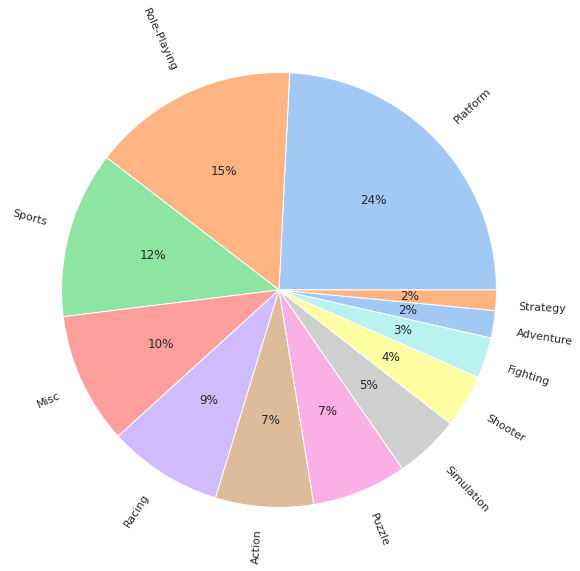

In [68]:
#소니그래프
plt.figure(figsize=(10,10)) 
plt.pie(nin3['total'], labels=nin3['Genre'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

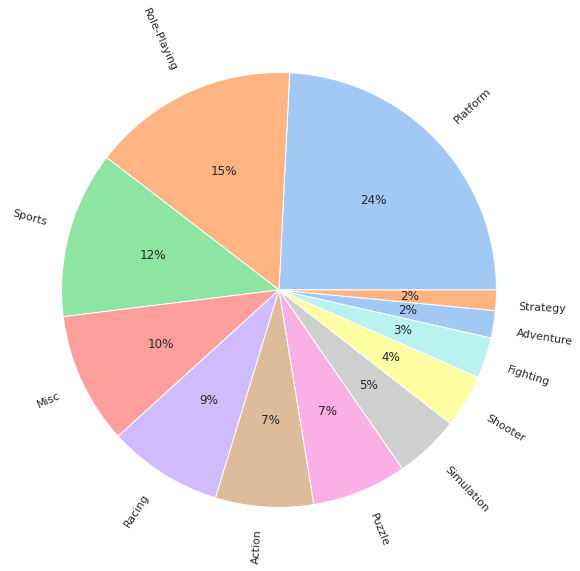

In [65]:
#닌텐도 그래프
# Seaborn color palette to plot pie chart
labels = nin3['Genre'] 
frequency = nin3['total']
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(frequency, labels=labels, colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [66]:
isin_filter2 = df_new3['Publisher'].isin(['Electronic Arts'])
df_isin2 = df_new3[isin_filter2]
df_el = df_isin2.reset_index(drop=True)
df_el2 = df_el[['Genre','total']]

el_sum = df_el2.groupby(df_el2['Genre']).sum()
el2 = el_sum.reset_index(inplace=False)
el2 = el2.sort_values(by='total' ,ascending=False)
el3 = el2.reset_index(drop=True)
el3

,Genre,total
0,Sports,466040.0
1,Shooter,157480.0
2,Racing,143540.0
3,Action,115050.0
4,Simulation,89460.0
5,Role-Playing,35290.0
6,Fighting,30890.0
7,Misc,19590.0
8,Strategy,14050.0
9,Platform,6500.0


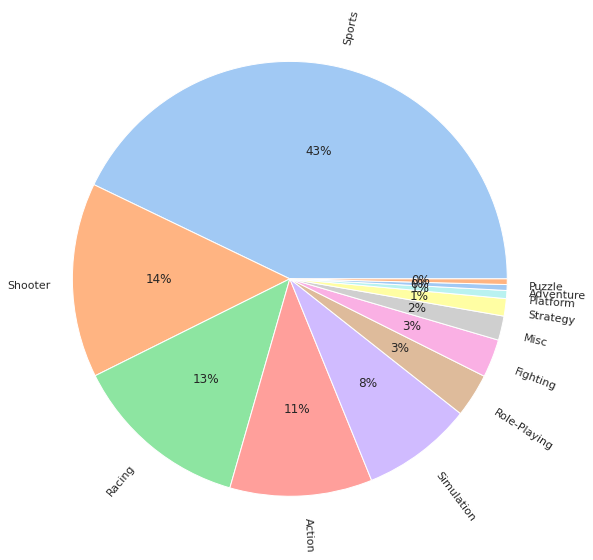

In [67]:
labels2 = el3['Genre'] 
frequency2 = el3['total']

colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(frequency2, labels=labels2, colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [89]:
# 플랫폼비중이 높은 회사들은 초반에 컷던 회사들로 앞으로의 가능성은 잘 모름, 따라서 c,d그룹에서 매출이 높은 액션게임을 분석하여 장점과 단점을 파악하여 제작하면 될 것으로 보임.
df_action = df_new3
df_action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490.0,29020.0,3770.0,8460.0,82740.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080.0,3580.0,6810.0,770.0,40240.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850.0,12880.0,3790.0,3310.0,35830.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750.0,11010.0,3280.0,2960.0,33000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270.0,8890.0,10220.0,1000.0,31380.0
...,...,...,...,...,...,...,...,...,...,...
16236,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10.0,0.0,0.0,0.0,10.0
16237,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10.0,0.0,0.0,0.0,10.0
16238,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10.0,0.0,0.0,0.0,10.0
16239,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.0,10.0,0.0,0.0,10.0


In [91]:
#액션 장르만 추출
isin_act = df_action['Genre'].isin(['Action'])
df_action = df_action[isin_act]
df_action = df_action[['Name','Year','Genre','Publisher','total']]
df_action

,Name,Year,Genre,Publisher,total
16,Grand Theft Auto V,2013,Action,Take-Two Interactive,21390.0
17,Grand Theft Auto: San Andreas,2004,Action,Take-Two Interactive,20810.0
23,Grand Theft Auto V,2013,Action,Take-Two Interactive,16380.0
24,Grand Theft Auto: Vice City,2002,Action,Take-Two Interactive,16150.0
37,Grand Theft Auto III,2001,Action,Take-Two Interactive,13100.0
...,...,...,...,...,...
16196,SoulCalibur Legends (JP sales),2007,Action,Namco Bandai Games,10.0
16199,Games Explosion!,2006,Action,THQ,10.0
16203,Teenage Mutant Ninja Turtles Double Pack,2006,Action,Konami Digital Entertainment,10.0
16234,Dead Rising,2016,Action,Capcom,10.0


In [121]:
act = (df_action.Year >= 2000)
df_act2 = df_action[act]
df_act3 = df_act2[['Publisher','total']]
df_act3

,Publisher,total
16,Take-Two Interactive,21390.0
17,Take-Two Interactive,20810.0
23,Take-Two Interactive,16380.0
24,Take-Two Interactive,16150.0
37,Take-Two Interactive,13100.0
...,...,...
16196,Namco Bandai Games,10.0
16199,THQ,10.0
16203,Konami Digital Entertainment,10.0
16234,Capcom,10.0


In [122]:
act_sum = df_act3.groupby(df_act3['Publisher']).sum()
act2 = act_sum.reset_index(inplace=False)
act2 = act2.sort_values(by='total' ,ascending=False)
act3 = act2.reset_index(drop=True)
act3 = act3.head(10)

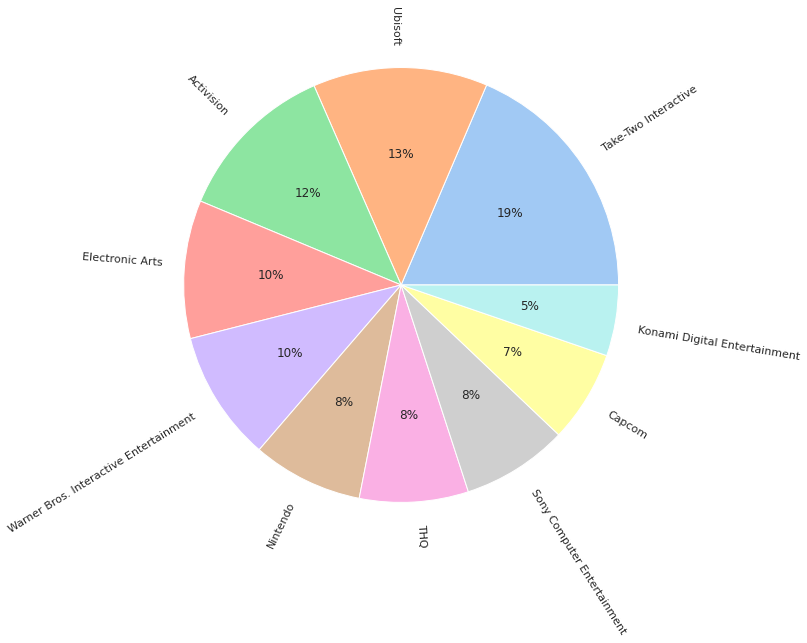

In [124]:
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.figure(figsize=(10,10)) 
plt.pie(act3['total'], labels=act3['Publisher'], colors=colors,
        autopct='%.0f%%', rotatelabels='true')
plt.show()

In [107]:
df_ff = df_new3
df_ff = df_ff[['Year','Publisher','total']]
ff = (df_ff.Year >= 2010)
df_ff2 = df_ff[ff]
df_ff3 = df_ff2[['Publisher','total']]
df_ff3

,Publisher,total
15,Microsoft Game Studios,21820.0
16,Take-Two Interactive,21390.0
23,Take-Two Interactive,16380.0
26,Nintendo,15320.0
29,Activision,14760.0
...,...,...
16225,5pb,10.0
16230,CyberFront,10.0
16232,Mastiff,10.0
16233,CyberFront,10.0


In [109]:
ff_sum = df_ff3.groupby(df_ff3['Publisher']).sum()
ff2 = ff_sum.reset_index(inplace=False)
ff2 = ff2.sort_values(by='total' ,ascending=False)
ff3 = ff2.reset_index(drop=True)
ff4=ff3.head(10)

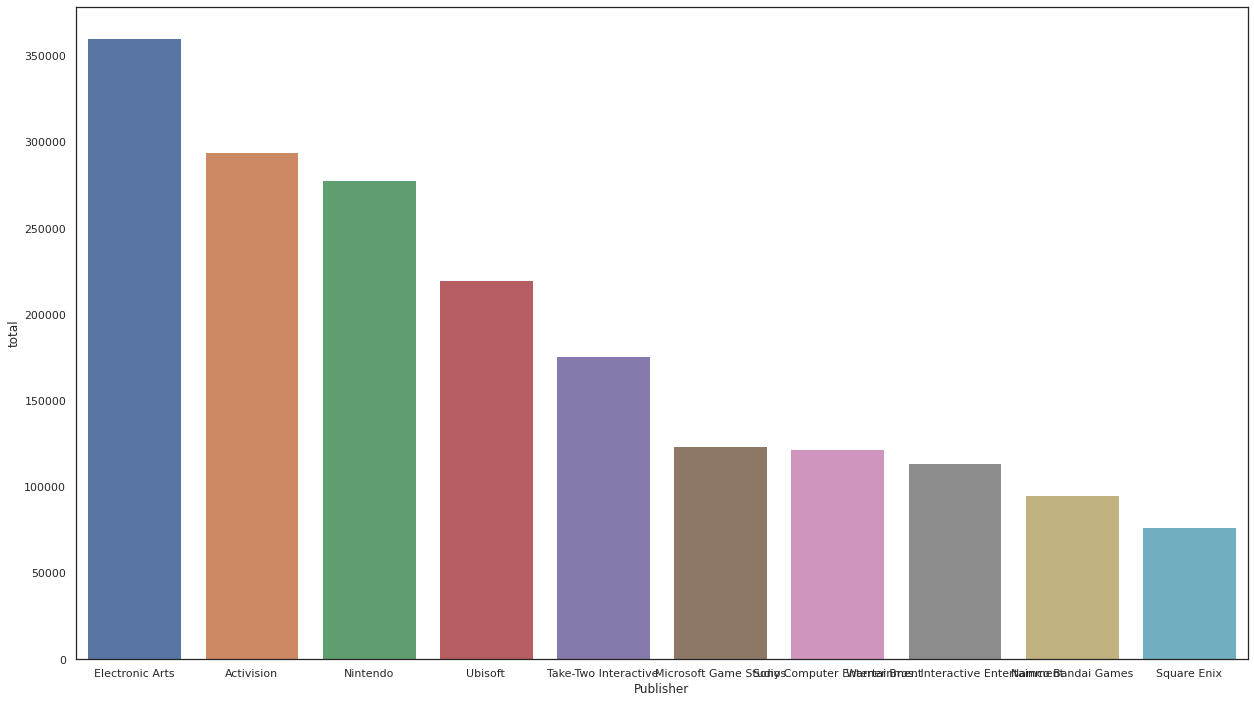

In [112]:
sns.set_style("white")
plt.figure(figsize=(21,12)) 
sns.barplot(x="Publisher", y="total", data=ff4)